In [ ]:
'''Kendime Notlar'''

'''Burada önce her bir veri setini incelemek içindeki
* Null valuelar
* Yanlış değerler
* Anlamsız değerler

Bunlar önceden her bir veri seti için yapılıp sonrasında ana tek bir set üzerinde birleştirildiğinde sıkıntı olmayacaktır. Lakin her halükarda bunu tekrardan kontrol etmek lazım.



The CSAT Survey and Product Bug datasets each involve 640 customers, and notably, they share the same set of IDs (every customer who gave a CSAT survey also has product bug records, which suggests these might be specific clients in a program).



Csat ile help ticket analizi first response time and csat

'''

"Burada önce her bir veri setini incelemek içindeki\n* Null valuelar\n* Yanlış değerler\n* Anlamsız değerler\n\nBunlar önceden her bir veri seti için yapılıp sonrasında ana tek bir set üzerinde birleştirildiğinde sıkıntı olmayacaktır. Lakin her halükarda bunu tekrardan kontrol etmek lazım.\n\n\n\n\n!+!'^! E-CORP Yaşları maksimum 72 ay olarak gözüküyor. Bunlar müşteri süresi olarak yaşmı yoksa gerçek yaşları mı öğren\n!+!'^!\n\n\nThe CSAT Survey and Product Bug datasets each involve 640 customers, and notably, they share the same set of IDs (every customer who gave a CSAT survey also has product bug records, which suggests these might be specific clients in a program).\n\n\n\nCsat ile help ticket analizi first response time and csat\n\n"

In [46]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


MRR: Müşterinin E-corp’a aylık olarak ödediği para miktarını gösterir.


Total Revenue: Müşterinin, E-corp ürünlerini kullanarak elde ettiği toplam gelir miktarını gösterir.


Help Ticket Count: Müşterinin, müşteri destek ekibinden yardım almak için oluşturduğu toplam talep sayısını gösterir.


Help Ticket Lead Time(hours): İlgili müşteri tarafından oluşturulan taleplerin ortalama çözüm süresini gösterir.


Company Newsletter Interaction Count: Müşterinin, E-corp tarafından gönderilen bültenlerle kaç kez etkileşime geçtiğini gösterir.


Status: Müşterinin satış sürecindeki mevcut durumunu gösterir.

--------------------------------------

# Univariate Analysis

### Csat Survey

In [3]:
# CSAT_Survey
csat_survey_data_df = pd.read_csv("data/CSAT_Survey_Data.csv")

csat_survey_data_df.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
0,CRM-1516050,2022,3,2022-07-01,2022-08-26,10,5,Once a Month,5,5.0,I need someone from Insider team to provide me...
1,CRM-1516050,2022,3,2022-07-01,2022-09-27,10,5,Once a Month,5,5.0,I don't use it often
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...
3,CRM-1470950,2022,3,2022-07-01,2022-09-30,6,3,Once a Week,4,4.0,I tried but could not find everything I need
4,CRM-1470950,2022,2,2022-04-01,2022-06-23,10,5,Once a Day,4,3.0,I need someone from Insider team to provide me...


Burada Csat Survey columnlarını açıkla

### Customer Age

In [4]:
# Customer_Age
customer_age_df = pd.read_csv("data/Customer_Age_Data.csv")

customer_age_df.head()

,CRM ID,Customer Age (Months)
0,CRM-1471650,24
1,CRM-1516050,13
2,CRM-1087300,25
3,CRM-1467150,12
4,CRM-230550,12


In [5]:
print("Customer Age Shape:")
print(customer_age_df.shape)

Customer Age Shape:
(2651, 2)


In [6]:
print("Customer Age Data Types: ")
print(customer_age_df.dtypes)

Customer Age Data Types: 
CRM ID                   object
Customer Age (Months)     int64
dtype: object


In [7]:
print("Missing Values for Customer Age Data:")
print(customer_age_df.isnull().sum())

Missing Values for Customer Age Data:
CRM ID                   0
Customer Age (Months)    0
dtype: int64


In [8]:
print("Number of duplicate rows:")
print(customer_age_df.duplicated().sum())


Number of duplicate rows:
0


In [9]:
print(f"Summary Statistics for Customer Age Data:")
print(customer_age_df.describe())

Summary Statistics for Customer Age Data:
       Customer Age (Months)
count            2651.000000
mean               20.077707
std                16.427542
min                 1.000000
25%                 7.000000
50%                15.000000
75%                27.000000
max                72.000000


In [10]:
retention_6m = 100 * (customer_age_df['Customer Age (Months)'] >= 6).sum() / len(customer_age_df)
retention_12m = 100 * (customer_age_df['Customer Age (Months)'] >= 12).sum() / len(customer_age_df)
retention_24m = 100 * (customer_age_df['Customer Age (Months)'] >= 24).sum() / len(customer_age_df)

print("Customer Retention Metrics:")
print(f"6-month retention rate: {retention_6m:.2f}%")
print(f"12-month retention rate: {retention_12m:.2f}%")
print(f"24-month retention rate: {retention_24m:.2f}%")

Customer Retention Metrics:
6-month retention rate: 82.35%
12-month retention rate: 63.79%
24-month retention rate: 33.16%


In [11]:
num_customers_above_27 = customer_age_df[customer_age_df["Customer Age (Months)"] > 27].shape[0]
print("Number of customers older than 27 months:", num_customers_above_27)


Number of customers older than 27 months: 660


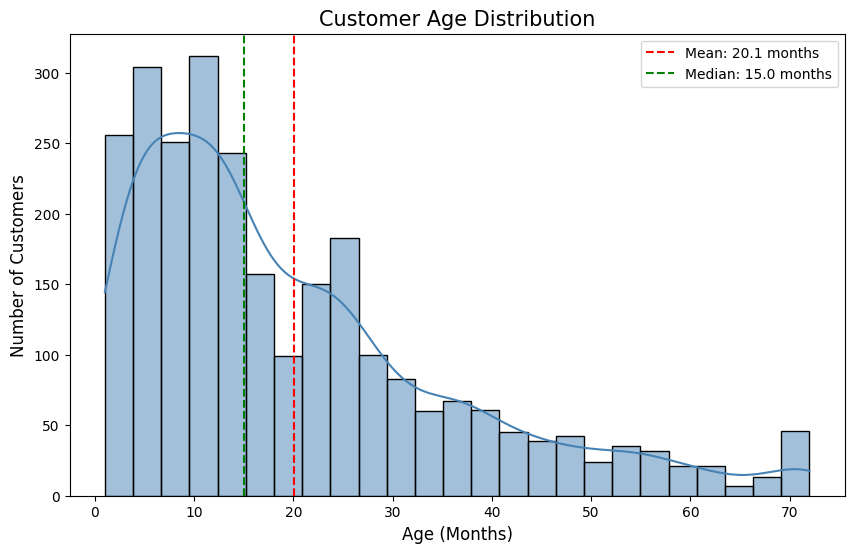

In [12]:
plt.figure(figsize=(10, 6))

sns.histplot(data=customer_age_df, x='Customer Age (Months)', kde=True, color='steelblue')
plt.axvline(customer_age_df['Customer Age (Months)'].mean(), color='red', linestyle='--',
            label=f'Mean: {customer_age_df["Customer Age (Months)"].mean():.1f} months')
plt.axvline(customer_age_df['Customer Age (Months)'].median(), color='green', linestyle='--',
            label=f'Median: {customer_age_df["Customer Age (Months)"].median():.1f} months')

plt.title('Customer Age Distribution', fontsize=15)
plt.xlabel('Age (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

Text(0.5, 0, 'Age (Months)')

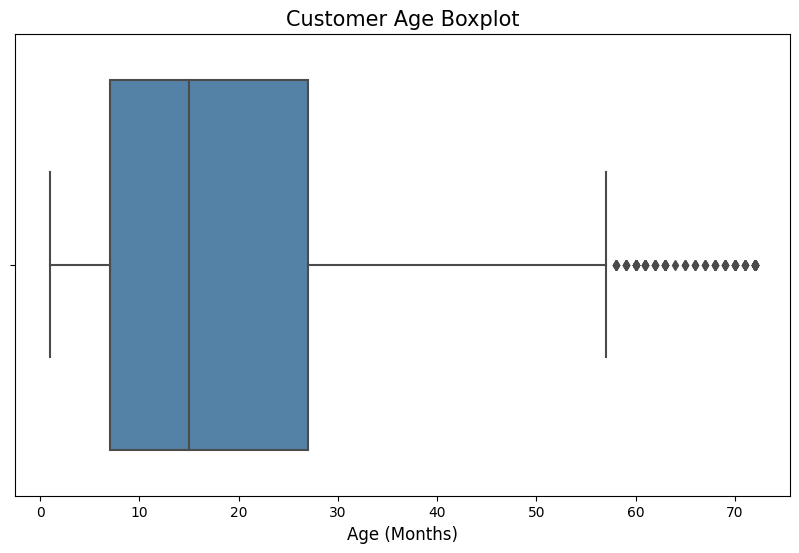

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_age_df['Customer Age (Months)'], color='steelblue')

# Customizing the plot
plt.title('Customer Age Boxplot', fontsize=15)
plt.xlabel('Age (Months)', fontsize=12)

# Display the plot

From these outputs;

* There are total **2651** customers for Age Dataset
* There is **widely spread** in Customer Age from 1 month customers to 72 months customers with standard deviation of 16.4.
* According to **percentiles** and Graphs; Customer Age distribution is **Positively (Right) Skewed**.



* About 75% of customers have been with the company for 27 months or less, This means most of the users are new.
* 6-month retention rate of 82.35%, but it drops to 63.79% at 12 months and further falls to 33.16% at 24 months. This rapid decrease between 12-24 months shows that many customers leave before they hit the two-year mark.
* Could be focused on **mid-long term** to customers to reduce loss, and increase tenured customers.
* By examining the nature of long-term customer interactions, we can gain insights and develop strategies that can extended user engagement. Such insights can then be used to cultivate a loyal customer base over time.
* The boxplot shows some values as outliers, but they likely represent **long-term customers**. Dropping them is not necessary unless there are missing or inconsistent customer IDs. Further investigation is needed before making any adjustments.

### Customer MRR (iNCELENECEK)

In [18]:
# Customer MRR
customer_mrr_df = pd.read_csv("data/Customer_MRR_Data.csv")

customer_mrr_df.head()

,Customer ID,MRR
0,CRM-5454800,"$8,212"
1,CRM-5479950,"$2,026"
2,CRM-5494800,"$2,100"
3,CRM-5598450,"$2,900"
4,CRM-5602550,"$1,898"


In [19]:
print(customer_mrr_df.shape)

(1380, 2)


* It appears that some of the customers in MRR data is missing, possibly due to their customer type or current customer type within the company, resulting in the absence of valid data at this time.

In [20]:
print("MRR Data Types: ")
print(customer_mrr_df.dtypes)

MRR Data Types: 
Customer ID    object
MRR            object
dtype: object


Since MRR is currently represented as an object with the currency symbol *'$'*, it should be converted to an integer value for proper analysis.

In [21]:
# Convert MRR to integer
customer_mrr_df['MRR'] = customer_mrr_df['MRR'].replace({r'\$': '', r',': ''}, regex=True).astype(np.int64)

In [23]:
print(customer_mrr_df.dtypes)
customer_mrr_df.head()

Customer ID    object
MRR             int64
dtype: object


,Customer ID,MRR
0,CRM-5454800,8212
1,CRM-5479950,2026
2,CRM-5494800,2100
3,CRM-5598450,2900
4,CRM-5602550,1898


In [24]:
print("Missing Values for Customer MRR Data:")
print(customer_mrr_df.isnull().sum())

Missing Values for Customer MRR Data:
Customer ID    0
MRR            0
dtype: int64


In [25]:
print("Number of duplicate rows:")
print(customer_age_df.duplicated().sum())

Number of duplicate rows:
0


In [26]:
print(f"Summary Statistics for Customer MRR Data:")
print(customer_mrr_df.describe())

Summary Statistics for Customer MRR Data:
                MRR
count   1380.000000
mean    3933.708696
std     5279.234169
min       26.000000
25%     1152.250000
50%     2424.000000
75%     4680.250000
max    62732.000000


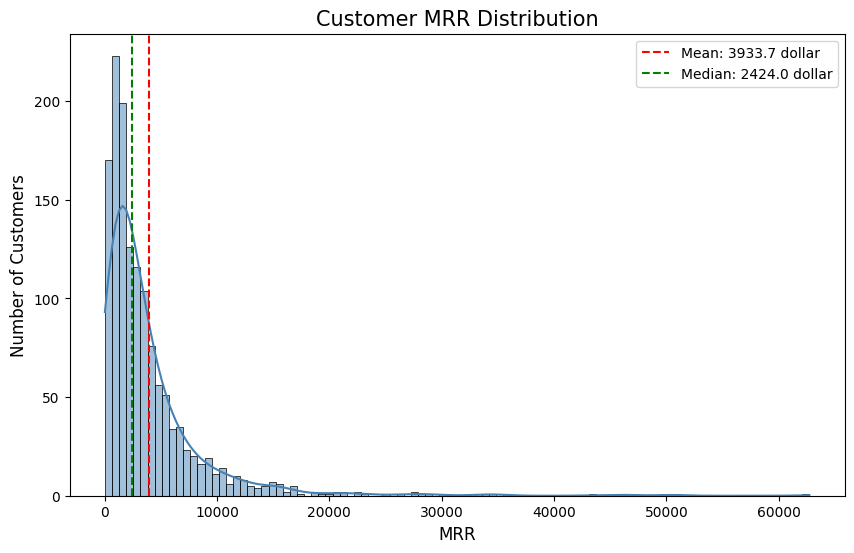

In [27]:
plt.figure(figsize=(10, 6))

sns.histplot(data=customer_mrr_df, x='MRR', kde=True, color='steelblue')
plt.axvline(customer_mrr_df['MRR'].mean(), color='red', linestyle='--',
            label=f'Mean: {customer_mrr_df["MRR"].mean():.1f} dollar')
plt.axvline(customer_mrr_df['MRR'].median(), color='green', linestyle='--',
            label=f'Median: {customer_mrr_df["MRR"].median():.1f} dollar')

plt.title('Customer MRR Distribution', fontsize=15)
plt.xlabel('MRR', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

Text(0.5, 0, 'MRR ($)')

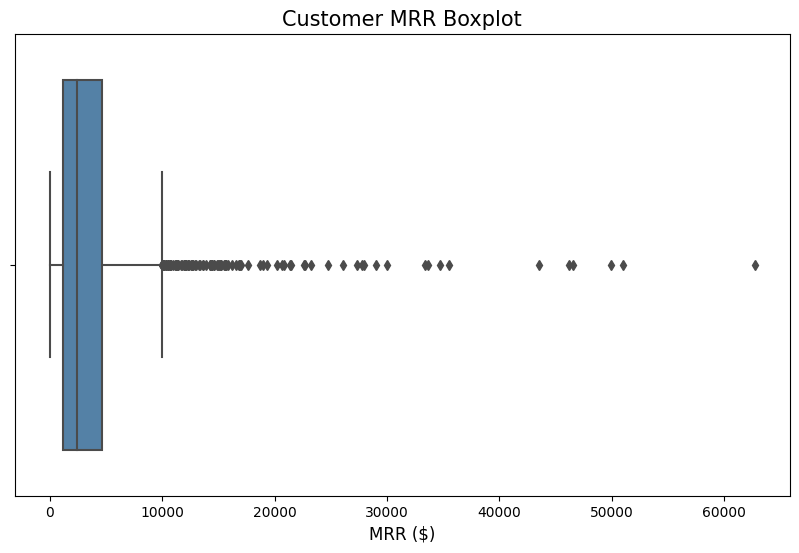

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_mrr_df['MRR'], color='steelblue')

# Customizing the plot
plt.title('Customer MRR Boxplot', fontsize=15)
plt.xlabel('MRR ($)', fontsize=12)

# Display the plot

From these we obtain these results;

* The histograms show **Strong Positive (Right) Skew** with many customers fall behind the MMR value of $ 5000 dollars (75%)


* Customers shows high volatile spending on E-Corp with standard deviation of **$ 5300**.

### Customer Revenue (İNCELENECEK)

In [119]:
# Customer Revenue

customer_revenue = pd.read_csv("data/Customer_Revenue_Data.csv")

customer_revenue

,Customer ID,Total Revenue
0,CRM-1470950,"$732,199"
1,CRM-1526100,$0
2,CRM-1506400,"$375,135"
3,CRM-1430550,$0
4,CRM-1485600,"$116,732"
...,...,...
896,CRM-783450,"$16,527"
897,CRM-1500500,$0
898,CRM-155450,"$567,026"
899,CRM-1499600,"$15,967,518"


In [120]:
print(customer_revenue.shape)

(901, 2)


* The **901** customers shows there is much less information than MRR

In [121]:
print("Customer Revenue Types: ")
print(customer_revenue.dtypes)

Customer Revenue Types: 
Customer ID      object
Total Revenue    object
dtype: object


In [124]:

customer_revenue['Total Revenue'] = customer_revenue['Total Revenue'].replace({r'\$': '', r',': ''}, regex=True).astype(np.int64)

In [125]:
print("Customer Revenue Types: ")
print(customer_revenue.dtypes)

Customer Revenue Types: 
Customer ID      object
Total Revenue     int64
dtype: object


In [126]:
customer_revenue

,Customer ID,Total Revenue
0,CRM-1470950,732199
1,CRM-1526100,0
2,CRM-1506400,375135
3,CRM-1430550,0
4,CRM-1485600,116732
...,...,...
896,CRM-783450,16527
897,CRM-1500500,0
898,CRM-155450,567026
899,CRM-1499600,15967518


In [127]:
print("Missing Values for Customer Revenue Data:")
print(customer_revenue.isnull().sum())

Missing Values for Customer Revenue Data:
Customer ID      0
Total Revenue    0
dtype: int64


In [128]:
print("Number of duplicate rows:")
print(customer_revenue.duplicated().sum())

Number of duplicate rows:
0


In [129]:
print(f"Summary Statistics for Customer Revenue Data:")
print(customer_revenue.describe())

Summary Statistics for Customer Revenue Data:
       Total Revenue
count   9.010000e+02
mean    1.259107e+07
std     1.218891e+08
min     0.000000e+00
25%     5.790000e+02
50%     6.074100e+04
75%     4.542900e+05
max     2.789805e+09


In [109]:
# Calculate the first and third quartiles
Q1 = customer_revenue['Total Revenue'].quantile(0.25)
Q3 = customer_revenue['Total Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to get outliers
outliers = customer_revenue[customer_revenue['Total Revenue'] > upper_bound]

# Display the outliers
print(outliers)


     Customer ID  Total Revenue
5    CRM-1548450        3128751
19    CRM-150500      175293442
26   CRM-1464800        2227584
37   CRM-1501100       27956189
38   CRM-1559050        1812341
..           ...            ...
871   CRM-626250        3451604
873   CRM-617450       30414659
874   CRM-608250        1802794
879  CRM-1492950       45226966
899  CRM-1499600       15967518

[143 rows x 2 columns]


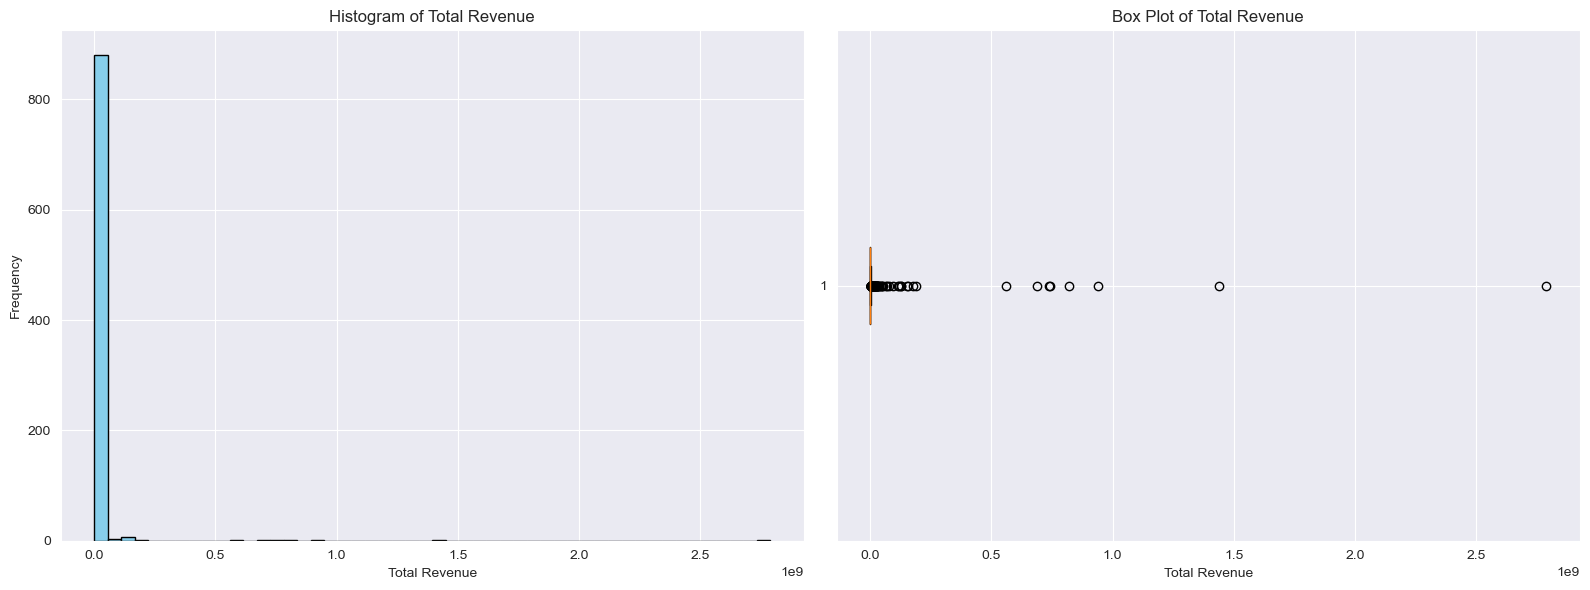

In [110]:
import matplotlib.pyplot as plt

# Assuming customer_revenue DataFrame is already loaded and cleaned.

# Create a figure with two subplots: one for histogram and one for box plot.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram plot with outliers
axes[0].hist(customer_revenue['Total Revenue'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Total Revenue')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Frequency')
# Optionally, use a log scale if the distribution is highly skewed
# axes[0].set_xscale('log')

# Box plot for Total Revenue
axes[1].boxplot(customer_revenue['Total Revenue'], vert=False)
axes[1].set_title('Box Plot of Total Revenue')
axes[1].set_xlabel('Total Revenue')

plt.tight_layout()
plt.show()


### Help Ticket

In [95]:
# Help ticket

help_ticket = pd.read_csv("data/Help_Ticket_Data.csv")

help_ticket.head()

,Customer ID,Help Ticket Count,Help Ticket Lead Time (hours)
0,CRM-1516050,9,418
1,CRM-1467150,8,382
2,CRM-1470950,30,366
3,CRM-1526100,4,1206
4,CRM-1506400,22,484


In [96]:
print("Help Ticket Shape:")
print(help_ticket.shape)


Help Ticket Shape:
(1367, 3)


In [97]:
print("Helpt Ticket Data Types: ")
print(help_ticket.dtypes)

Helpt Ticket Data Types: 
Customer ID                      object
Help Ticket Count                 int64
Help Ticket Lead Time (hours)     int64
dtype: object


In [98]:
print("Missing Values for Help Ticket Data:")
print(help_ticket.isnull().sum())

Missing Values for Help Ticket Data:
Customer ID                      0
Help Ticket Count                0
Help Ticket Lead Time (hours)    0
dtype: int64


In [100]:
print("Number of duplicate rows in Customer ID:")
print(help_ticket['Customer ID'].duplicated().sum())


Number of duplicate rows in Customer ID:
0


In [101]:
duplicates = help_ticket[help_ticket.duplicated(
    subset=['Help Ticket Count', 'Help Ticket Lead Time (hours)'], keep=False)]
print("Number of duplicate rows based on the columns:", duplicates.shape[0])

duplicate_groups = help_ticket.groupby(['Help Ticket Count', 'Help Ticket Lead Time (hours)'])
for (ticket_count, lead_time), group in duplicate_groups:
    if len(group) > 1:
        print(" ")
        print(f"Duplicates for (Help Ticket Count={ticket_count}, Lead Time={lead_time}):")
        print(group[['Customer ID', 'Help Ticket Count', 'Help Ticket Lead Time (hours)']])


Number of duplicate rows based on the columns: 54
 
Duplicates for (Help Ticket Count=1, Lead Time=77):
     Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
359  CRM-1485850                  1                             77
912  CRM-1538350                  1                             77
 
Duplicates for (Help Ticket Count=1, Lead Time=97):
     Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
172  CRM-1441700                  1                             97
197  CRM-1519950                  1                             97
 
Duplicates for (Help Ticket Count=1, Lead Time=247):
      Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
781    CRM-796500                  1                            247
1131  CRM-1480950                  1                            247
 
Duplicates for (Help Ticket Count=1, Lead Time=301):
      Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
511   CRM-1352350                  1                      

* In **Help Ticket Dataset**, Customer ID values show no duplication, same as the other datasets examined. Each Customer ID is unique. But;
* The analysis shows that **54 customers** share identical values for both **Help Ticket Count** and **Help Ticket Lead Time (hours)**.
* While some overlap in service metrics might occur by chance, the presence of multiple customers with exactly the same values warrants further investigation.
  - For instance, the group with **(Help Ticket Count=1, Lead Time=301)** contains **10 customers**.
  - Similarly, the group with **(Help Ticket Count=21, Lead Time=412)** includes **2 customers**.
  - Etc...
- While some duplicated metric values might occur by coincidence, the high frequency of identical entries suggests that most are unlikely to be random.
- This pattern could indicate issues in data entry or recording, which may distort the overall analysis and misinform customer service performance assessments.
- It is advisable to review the data collection and processing methods to verify the accuracy of these entries before drawing final conclusions on customer service metrics.

In [102]:
print(f"Summary Statistics for Help Ticket Data:")
print(help_ticket.describe())

Summary Statistics for Help Ticket Data:
       Help Ticket Count  Help Ticket Lead Time (hours)
count        1367.000000                    1367.000000
mean           17.397952                     786.302853
std            25.354291                     672.856978
min             1.000000                       0.000000
25%             3.000000                     387.500000
50%             9.000000                     603.000000
75%            22.000000                     976.000000
max           443.000000                   11632.000000


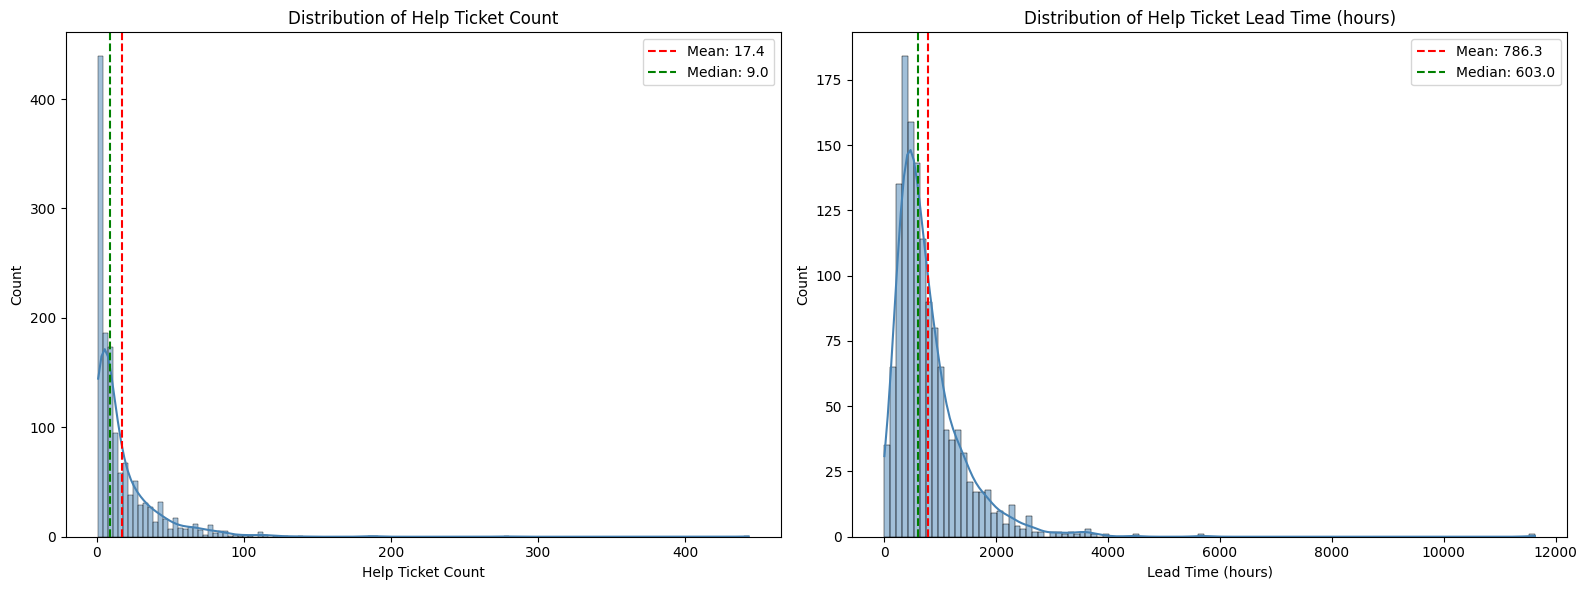

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(help_ticket['Help Ticket Count'], kde=True, color='steelblue', ax=axes[0])
axes[0].axvline(help_ticket['Help Ticket Count'].mean(), color='red', linestyle='--',
                label=f'Mean: {help_ticket["Help Ticket Count"].mean():.1f}')
axes[0].axvline(help_ticket['Help Ticket Count'].median(), color='green', linestyle='--',
                label=f'Median: {help_ticket["Help Ticket Count"].median():.1f}')
axes[0].set_title("Distribution of Help Ticket Count")
axes[0].set_xlabel("Help Ticket Count")
axes[0].legend()

sns.histplot(help_ticket['Help Ticket Lead Time (hours)'], kde=True, color='steelblue', ax=axes[1])
axes[1].axvline(help_ticket['Help Ticket Lead Time (hours)'].mean(), color='red', linestyle='--',
                label=f'Mean: {help_ticket["Help Ticket Lead Time (hours)"].mean():.1f}')
axes[1].axvline(help_ticket['Help Ticket Lead Time (hours)'].median(), color='green', linestyle='--',
                label=f'Median: {help_ticket["Help Ticket Lead Time (hours)"].median():.1f}')
axes[1].set_title("Distribution of Help Ticket Lead Time (hours)")
axes[1].set_xlabel("Lead Time (hours)")
axes[1].legend()

plt.tight_layout()
plt.show()


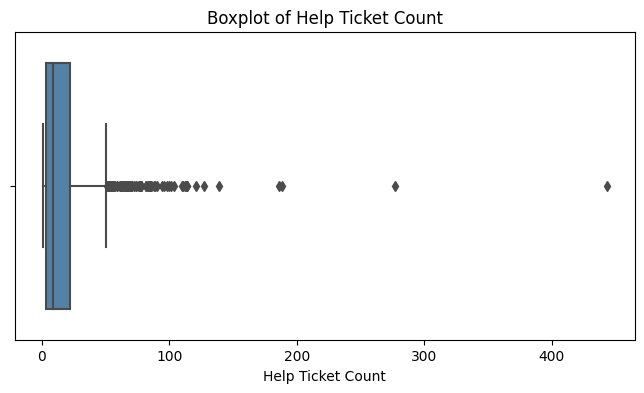

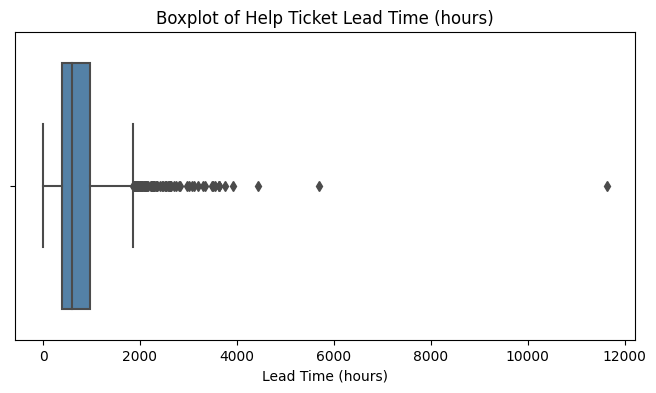

In [83]:
# Boxplot for Help Ticket Count
plt.figure(figsize=(8, 4))
sns.boxplot(x=help_ticket['Help Ticket Count'], color='steelblue')
plt.title("Boxplot of Help Ticket Count")
plt.xlabel("Help Ticket Count")
plt.show()

# Boxplot for Help Ticket Lead Time
plt.figure(figsize=(8, 4))
sns.boxplot(x=help_ticket['Help Ticket Lead Time (hours)'], color='steelblue')
plt.title("Boxplot of Help Ticket Lead Time (hours)")
plt.xlabel("Lead Time (hours)")
plt.show()


* Histogram, Box Plots Distributions and Statistical Analysis;
* Both of the graphs are **Positively (Right) Skew** and very high tails.
* The presence of the extreme values in both **Help Ticket Count** and **Help Ticket Lead** can distort the mean, making it less representative of the distribution

* In **Help Ticket Lead**; 
    - Extended lead times may result from unresolved tickets or gaps in recordkeeping (e.g., tickets not being properly closed).
    - Analyzing these cases and reasons can help identify issues in customer product usage, potentially highlighting areas for service improvement.
* In **Help Ticket Count**; 
    - Examining the frequency of ticket submissions can uncover recurring issues and enable proactive measures to address systemic problems.
    - Duplicate or erroneous records—such as multiple entries for the same issue—can artificially inflate the ticket count, necessitating careful data validation.


* Investigating outliers is crucial to distinguish between genuine customer concerns and data errors. This detailed analysis ensures that the derived insights are accurate and support effective decision-making.

In [89]:
Q1_count = help_ticket['Help Ticket Count'].quantile(0.25)
Q3_count = help_ticket['Help Ticket Count'].quantile(0.75)
IQR_count = Q3_count - Q1_count

outliers_count = help_ticket[(help_ticket['Help Ticket Count'] < Q1_count - 1.5 * IQR_count) |
                                (help_ticket['Help Ticket Count'] > Q3_count + 1.5 * IQR_count)]
print("Outliers in Help Ticket Count:")
print(outliers_count[['Customer ID', 'Help Ticket Count']])


Outliers in Help Ticket Count:
      Customer ID  Help Ticket Count
29     CRM-150500                443
30     CRM-835900                 52
46    CRM-1456200                 72
107    CRM-329450                 57
116   CRM-1103750                 64
156   CRM-1290050                 61
160    CRM-558200                112
175   CRM-1494150                 52
182   CRM-1494000                 82
187   CRM-1468200                 74
196   CRM-1437350                 57
198   CRM-1460150                 70
200    CRM-927200                 71
205    CRM-556900                 68
210   CRM-1471600                 62
218   CRM-1494300                 65
221   CRM-1437050                 66
222   CRM-1515700                 59
223   CRM-1002400                 55
225   CRM-1483050                 57
239    CRM-156100                 53
246    CRM-510050                 55
249   CRM-1467750                 89
264    CRM-724550                 86
276   CRM-1483600                 74
289    

In [90]:
Q1_lead = help_ticket['Help Ticket Lead Time (hours)'].quantile(0.25)
Q3_lead = help_ticket['Help Ticket Lead Time (hours)'].quantile(0.75)
IQR_lead = Q3_lead - Q1_lead

outliers_lead = help_ticket[(help_ticket['Help Ticket Lead Time (hours)'] < Q1_lead - 1.5 * IQR_lead) |
                               (help_ticket['Help Ticket Lead Time (hours)'] > Q3_lead + 1.5 * IQR_lead)]
print("Outliers in Help Ticket Lead Time (hours):")
print(outliers_lead[['Customer ID', 'Help Ticket Lead Time (hours)']])


Outliers in Help Ticket Lead Time (hours):
      Customer ID  Help Ticket Lead Time (hours)
36    CRM-1467350                           2480
43    CRM-1458050                           2221
70     CRM-706750                           2049
74    CRM-1493700                           2277
76     CRM-401300                           2027
90     CRM-175300                           1931
96     CRM-753900                           4446
145   CRM-1177150                           2151
157    CRM-237150                           2797
180   CRM-1485650                           1954
185   CRM-1267450                           1865
189    CRM-198350                           2129
263    CRM-340500                          11632
278   CRM-1458300                           2111
280    CRM-756850                           2237
304   CRM-1500400                           2012
305   CRM-1165250                           3125
311   CRM-1473350                           2546
385   CRM-1531100         

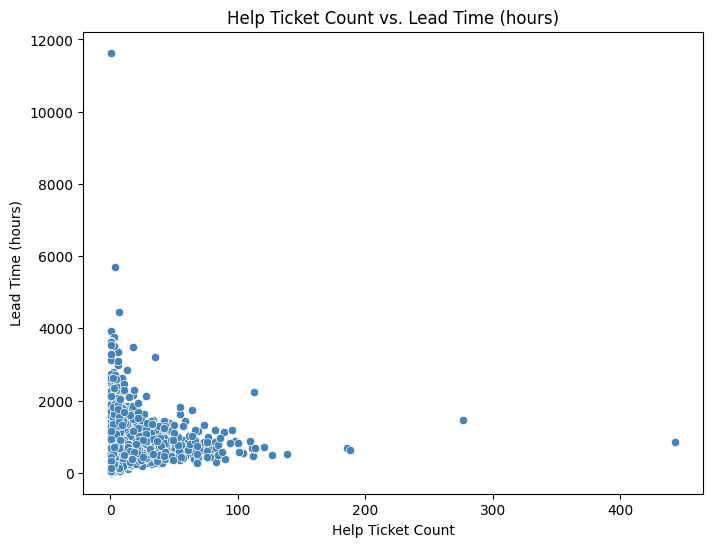

Pearson Correlation: -0.03
P-value: 0.3027


In [93]:

from scipy.stats import pearsonr

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Help Ticket Count', y='Help Ticket Lead Time (hours)', data=help_ticket, color='steelblue')
plt.title("Help Ticket Count vs. Lead Time (hours)")
plt.xlabel("Help Ticket Count")
plt.ylabel("Lead Time (hours)")
plt.show()


corr_value, p_value = pearsonr(
    help_ticket['Help Ticket Count'],
    help_ticket['Help Ticket Lead Time (hours)']
)

print(f"Pearson Correlation: {corr_value:.2f}")
print(f"P-value: {p_value:.4f}")


* From the obtained results and plots;
- Correlation Coefficient: A Pearson correlation of **-0.03** is very close to zero, indicating essentially no linear relationship between **Help Ticket Count** and **Help Ticket Lead Time**.
- Statistical Significance: With a **p-value of 0.3027** (greater than 0.05), the result is not statistically significant.

### Newsletter Interaction

In [120]:
# Newsletter Interaction

newsletter_df = pd.read_csv("data/Newsletter_Interaction_Data.csv")

newsletter_df.head()

,Customer ID,Company Newsletter Interaction Count
0,CRM-160150,54
1,CRM-166800,27
2,CRM-927200,24
3,CRM-1526050,23
4,CRM-1489600,20


In [121]:
print("Shape of Newsletter Dataset:")
print(newsletter_df.shape)

Shape of Newsletter Dataset:
(251, 2)


In [122]:
print("Customer Newsletter  Data Types: ")
print(newsletter_df.dtypes)

Customer Newsletter  Data Types: 
Customer ID                             object
Company Newsletter Interaction Count     int64
dtype: object


In [123]:
print("Missing Values for Customer Newsletter Data:")
print(newsletter_df.isnull().sum())

Missing Values for Customer Newsletter Data:
Customer ID                             0
Company Newsletter Interaction Count    0
dtype: int64


In [124]:
print("Number of duplicate rows:")
print(newsletter_df['Customer ID'].duplicated().sum())

Number of duplicate rows:
0


In [125]:
print("Statistical Analysis of Newsletter Data")
print(newsletter_df.describe())

Statistical Analysis of Newsletter Data
       Company Newsletter Interaction Count
count                            251.000000
mean                               4.414343
std                                5.374350
min                                1.000000
25%                                2.000000
50%                                3.000000
75%                                5.000000
max                               54.000000


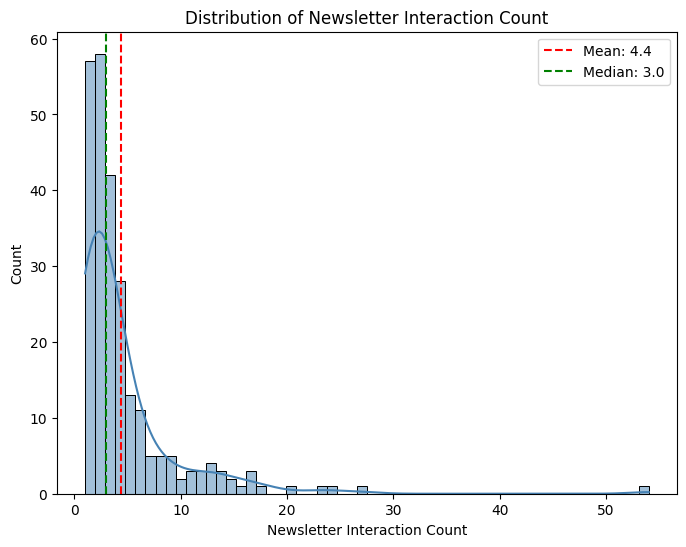

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=newsletter_df, x='Company Newsletter Interaction Count', kde=True, color='steelblue')
plt.axvline(newsletter_df['Company Newsletter Interaction Count'].mean(), color='red', linestyle='--',
            label=f"Mean: {newsletter_df['Company Newsletter Interaction Count'].mean():.1f}")
plt.axvline(newsletter_df['Company Newsletter Interaction Count'].median(), color='green', linestyle='--',
            label=f"Median: {newsletter_df['Company Newsletter Interaction Count'].median():.1f}")
plt.title("Distribution of Newsletter Interaction Count")
plt.xlabel("Newsletter Interaction Count")
plt.legend()
plt.show()


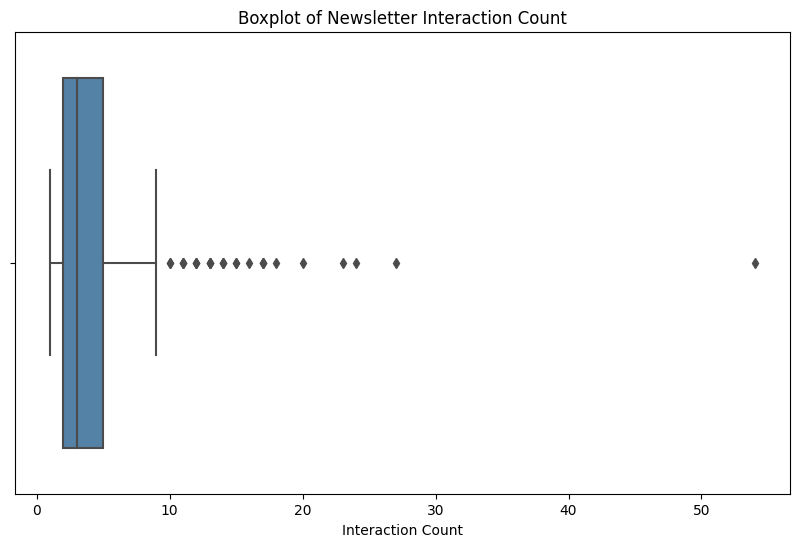

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=newsletter_df['Company Newsletter Interaction Count'], color='steelblue')
plt.title("Boxplot of Newsletter Interaction Count")
plt.xlabel("Interaction Count")
plt.show()


* The histogram shows, **Positively (Right) Skewed** plot similary the other hist plots.
* Since there is small data group in Newsletter Interecation (eg., 251), and each belong to unique **Customer**.
    - Outliers could inflate the mean and distribution of the dataset but without proper verification and clarification we should see those values as valid. Further validation required.

### Product Bug

In [136]:
# Product Bug Task

product_bug_task_df = pd.read_csv("data/Product_Bug_Task_Data.csv")

product_bug_task_df.head()

,Customer ID,Product Bug Task Count
0,CRM-1526150,179
1,CRM-1477300,150
2,CRM-1450300,66
3,CRM-661350,116
4,CRM-1435450,106


product_bug _task incelenmesi

### Region and Vertical

In [15]:
# Region and Vertical

region_and_vertical_df = pd.read_csv("data/RegionAndVertical_Data.csv")

region_and_vertical_df.head()

,Customer ID,Region,Vertical,Subvertical
0,CRM-1471650,Malaysia,Media and Publishing,Content Websites
1,CRM-1516050,Taiwan,Retail,Fashion Retailer
2,CRM-1087300,Australia,Transportation and Logistics,Transportation and Logistics
3,CRM-1467150,Taiwan,Retail,Marketplace
4,CRM-230550,Turkey,Retail,Fashion Retailer


Region and vertical incelemesi

### Status and Level

In [116]:
# Status and Level

status_and_level_df = pd.read_csv("data/StatusAndLevel_Data.csv")

status_and_level_df.head()

,Customer ID,Status,Customer Level
0,CRM-1471650,Onboarding,Enterprise
1,CRM-1516050,Onboarding,Long-tail
2,CRM-1087300,Churn,Semi-Enterprise
3,CRM-1467150,Churn,Semi-Enterprise
4,CRM-230550,Churn,Long-tail


### Bulunan sonuçlara göre genel bir çıkarım

* Verilen ayrı veri setleri üzerinde **Region and Vertical** , **Status** ve **Age** veri setleri **2651** Customer ile bizim için ana veri listesi ya da **Master List** olarak kabul edilecektir.

* Geri kalan veri setleri ana veri setlerimiz üzerinde küçük bir kümeye ait kişilerden oluşmaktadır. Revenue veri seti **900** Customer, Newsletter **251** gibi.